# Data Exploration

## Introduction

The objective of this work is to find a recommender system to ofer a service to costumers of this grocerys chain. The principal target is if one costumer forbit somethig else the system was capable to advice them when they pass for the checkout.

Next steps on this notebook are to take an idea of the sells of an individual grocery as a bird's eye view.

The objective is try to find errors, boundaries, clean data and finally Prepare the terrain to apply next the recommender algorithms.

## Getting Data from Source.

The data is extracted from the database that is prepared to inform to the state of each operation. So the information no is fully but is totally verified in order to avoid inspections and fines.

The proces of extraction is done out of this notebook because the location of this data is in a secured server and for security reasons the proceses can't be explained. And we get only the data allowed by the company to do this project. 

The files obtained are in CSV format.

**Important! The datasets used in this projects can't be used anywhere else without an explicit autoritzation.**


In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive

## Preparing access to files

This Jupyter Notebook are prepared to be ran on a Google Colab platform. So, the data is stored in a path on Google Drive. This part can be changed to be adapted to each platform.

In [ ]:
drive.mount('/content/drive')
path_owner = "/content/drive/MyDrive/owner.txt"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Run only one time with your user to personalize your path
# print("USER_NAME", file=open(path_owner, "w"), end='')

In [ ]:
with open(path_owner) as f:
    current_user = f.readline()

print("current user:", current_user)

# add the your path in a elif condition
if(current_user == "sergi"):
  base_path = '/content/drive/MyDrive/Master/DataMining/final/data'
else:
  base_path = '/content/drive/MyDrive/'

print("your base path: ", base_path)

current user: sergi
your base path:  /content/drive/MyDrive/Master/Project Big Data/Project Big Data/


In [ ]:
file_products = base_path + 'data/ARTICLES.csv'
file_families = base_path + 'data/AECOC.csv'
file_sells_2020 = base_path + 'data/s20.csv'
file_sells_2019 = base_path + 'data/s19.csv'

## Exploring file of Products


File of products has 3 columns:
1. **product_id**: number of the product
2. **product_desc**: A truncated description of the products
3. **family_id**: Relation with families by its id.

Sample of some lines:
```csv
ARTICLE;DESCRIPCIO;SECTOR;SECCIO;FAMILIA;DESC
10002;LIMPIACRISTALES BONA;3;1;6;03*01*06
10003;LIMPIACRISTALES BONA;3;1;6;03*01*06
10004;FREGASUELOS CAG 1 L;3;1;6;03*01*06
10006;VAJILLAS CONCENTRADO;3;1;4;03*01*04
10007;VAJILLAS VERDE BONAC;3;1;4;03*01*04
...
```


In [ ]:
products = pd.read_csv(file_products,sep=';',encoding='ISO-8859-1', skiprows=1,\
                    names=['product_id','product_desc','x1','x2','x3','family_id'])\
                    .drop(['x1','x2','x3'],axis=1).set_index('product_id')      
products.head()

,product_desc,family_id
product_id,,
10000,LIMPIACRISTALES CON,03*01*06
10001,LIMPIACRISTALES RECA,03*01*06
10002,LIMPIACRISTALES BONA,03*01*06
10003,LIMPIACRISTALES BONA,03*01*06
10004,FREGASUELOS CAG 1 L,03*01*06


In [ ]:
print("Number of rows:",f"{products.index.size:,}")

Number of rows: 72,200


We can view that a lot of products has de same description as count of different descriptions are very lower. This is because the descriptions are trunkated and the last part usuarlly informs the more especific infromation as type, quantity on other caracteristics that can make one product different from other. The number of family_id is pretty lower than existent families that is 720.

In [ ]:
products.nunique()

product_desc    34217
family_id         450
dtype: int64

The catalog of products has several products without its description. In really it isn't a problem because this only take effect when we like show the description of each product recommended. In fact, these products can be eliminated as they surely do not exist now.

In [ ]:
print("Total of null cells: ", products.isnull().sum().sum())

Total of null cells:  555


In [ ]:
products[products['family_id'].isnull()]

,product_desc,family_id
product_id,,


In [ ]:
products[products['product_desc'].isnull()]

,product_desc,family_id
product_id,,
307355,NaN,60*04*04
307356,NaN,60*04*04
307357,NaN,60*04*04
307358,NaN,60*04*04
307365,NaN,60*04*03
...,...,...
313380,NaN,40*01*01
313383,NaN,40*01*03
313384,NaN,50*01*08


## Exploring file of sells 2020

The file of sales contains 7 columns.
1. **invoice_id:** Identify the invoice id. This columns offer the grouping method to get the products of each individual sale. The format are:
 - 2 digit: year
 - 2 digit: company department
 - dash '-'
 - T + 4 digits : Store number
 - C + 2 digits : Checkout number
 - dash '-'
 - Number of invoice.
2. **product_id:** Identify the id of product sold. The description of this product can be obtained on the product's file.
3. **units:** The quantity of the same products sold. This units are multiplied by one million. This is done to avoid problems with floats
4. **amount:** The price that the customer paid for the products. This is multiplied by a hundred to avoid problems with floats.
5. **chechout:** The cash that the customer used to manage his bought.
6. **date:** The day that this operation is done. This date is in days since 1st January, 1968.
7. **hour:** The hour in seconds since midnight of this operation. 
All lines of same invoice has the same date and hour as this date 


This file contains each product that are sold. The invoice_id group each line that is sold to unique customer. Each file contains all lines sold by one checkout in a year. So, This could have easily more that one milion of lines.

Sample of some lines:
```csv
2027-T0101C01-100089;3055;1000000;24;01;19343;35707
2027-T0101C01-100089;3055;1000000;24;01;19343;35707
2027-T0101C01-100089;6989;1000000;0;01;19343;35707
2027-T0101C01-100188;8939;1000000;226;01;19343;44143
2027-T0101C01-100188;8939;1000000;228;01;19343;44143
...
```

In [ ]:
sells_2020 = pd.read_csv(file_sells_2020,sep=';',encoding='ISO-8859-1',\
                    names=['invoice_id','product_id','units','amount','checkout','date','hour'])
sells_2020.head()

,invoice_id,product_id,units,amount,checkout,date,hour
0,2027-T0132C01-000001,6252,4000000,419,1,18995,31737
1,2027-T0132C01-000001,4465,1000000,148,1,18995,31737
2,2027-T0132C01-000001,4465,1000000,132,1,18995,31737
3,2027-T0132C01-000001,4465,1000000,131,1,18995,31737
4,2027-T0132C01-000001,4465,1000000,130,1,18995,31737


The dataset includes a complet year of one store.

In [ ]:
print("Number of rows:",f"{sells_2020.size:,}")

Number of rows: 8,096,494


The Number of differents products sold:

In [ ]:
len(sells_2020['product_id'].unique())

1100

In [ ]:
print("Total of null cells: ", sells_2020.isnull().sum().sum())

Total of null cells:  0


Stadistical data of each column

In [ ]:
sells_2020.describe()

,product_id,units,amount,checkout,date,hour
count,1.156642e+06,1.156642e+06,1.156642e+06,1.156642e+06,1.156642e+06,1.156642e+06
mean,5.701116e+03,1.077406e+06,1.752512e+02,1.401873e+00,1.917692e+04,5.034318e+04
std,4.406011e+03,8.047983e+05,1.865430e+02,8.013320e-01,1.069715e+02,1.160371e+04
min,2.000000e+02,-5.400000e+07,-1.180500e+04,1.000000e+00,1.899500e+04,2.784100e+04
25%,3.483000e+03,1.000000e+06,8.500000e+01,1.000000e+00,1.908000e+04,4.098200e+04
50%,5.954000e+03,1.000000e+06,1.380000e+02,1.000000e+00,1.917800e+04,4.726400e+04
75%,7.603000e+03,1.000000e+06,2.300000e+02,1.000000e+00,1.927100e+04,6.056800e+04
max,9.153400e+04,7.200000e+07,1.363600e+04,3.000000e+00,1.935900e+04,7.467400e+04


Next, the data are fix to view clearly the information fixing units, amount and time.


In [ ]:
# Units
sells_2020['units_fix'] = sells_2020['units'].map(lambda u: u/1000000)

# Amount
sells_2020['amount_fix'] = sells_2020['amount'].map(lambda u: u/100)

# Time
from datetime import datetime,timedelta
def toDate(row):
  StartDate = "12/31/1967"
  Date = datetime.strptime(StartDate, "%m/%d/%Y")
  return Date.replace(hour=0, minute=0, second=0, microsecond =0)+timedelta(days=row)

sells_2020['date_fix'] = sells_2020['date'].map(toDate)
sells_2020['hour_fix'] = sells_2020['hour'].apply(lambda h:  h/3600).astype('int32')
sells_2020[['invoice_id','units_fix','amount_fix','date_fix','hour_fix']]

,invoice_id,units_fix,amount_fix,date_fix,hour_fix
0,2027-T0132C01-000001,4.0,4.19,2020-01-02,8
1,2027-T0132C01-000001,1.0,1.48,2020-01-02,8
2,2027-T0132C01-000001,1.0,1.32,2020-01-02,8
3,2027-T0132C01-000001,1.0,1.31,2020-01-02,8
4,2027-T0132C01-000001,1.0,1.30,2020-01-02,8
...,...,...,...,...,...
1156637,2027-T0132C03-034310,1.0,2.86,2020-12-31,13
1156638,2027-T0132C03-034310,1.0,0.91,2020-12-31,13
1156639,2027-T0132C03-034310,1.0,1.17,2020-12-31,13
1156640,2027-T0132C03-034310,1.0,1.11,2020-12-31,13


## Stadistical plots of Sells 2020

The plots are only using the units columns. Later is demonstrated that we can take units or amounts indistinctly.

### Sells by day

In [ ]:
sells_2020_byday = sells_2020.groupby(by=["date_fix"]).agg({'units_fix':'sum'})
sells_2020_byday

,units_fix
date_fix,
2020-01-02,3744.0
2020-01-03,4616.0
2020-01-04,4670.0
2020-01-05,2352.0
2020-01-06,1311.0
...,...
2020-12-27,2640.0
2020-12-28,4072.0
2020-12-29,4584.0


In the plot it's observable some questions:
- The peak of sales with the Panic of COVID starts on mid march of 2020.
- Afther the peak of sales these are lower specially on weekends. but slowly it are recovering.
- A similar pattern can be sensed many weeks

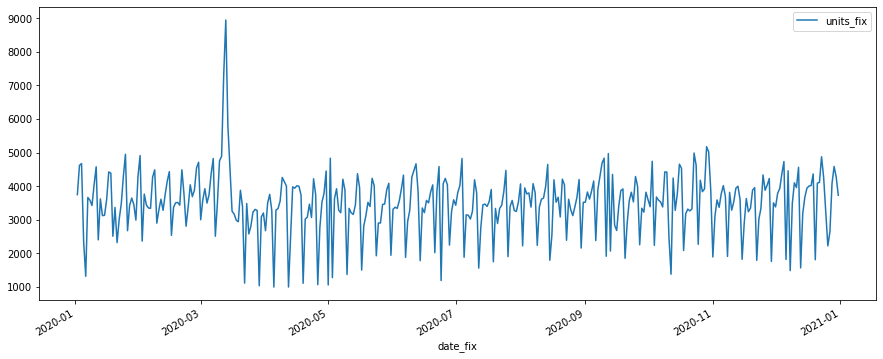

In [ ]:
sells_2020_byday.plot(figsize=(15, 6))

### Sells by month

It's more clear the affect of convid on reduction of sales since march but it slowly recovers and last trimester seems as first trimester.

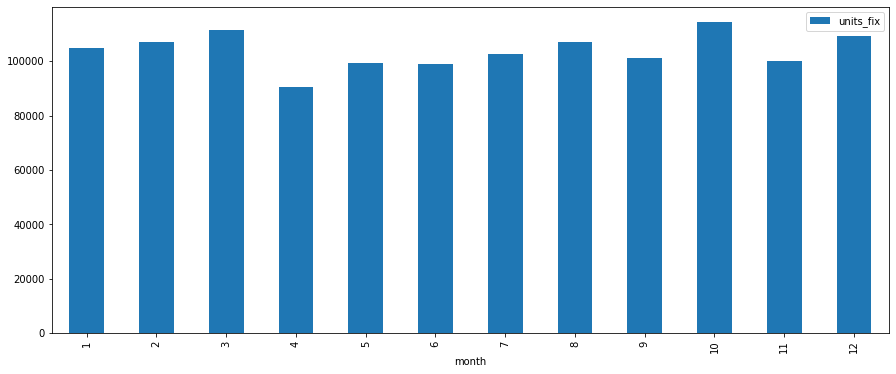

In [ ]:
sells_2020_byday['month'] =sells_2020_byday.index.map(lambda dt: dt.month)
sells_2020_bymonth = sells_2020_byday.groupby(by=["month"]).agg({'units_fix':'sum'})
sells_2020_bymonth.plot(kind='bar',figsize=(15, 6))

### Sells by week

the first and the last week can be lower because it has a good chance that it won't be a full week

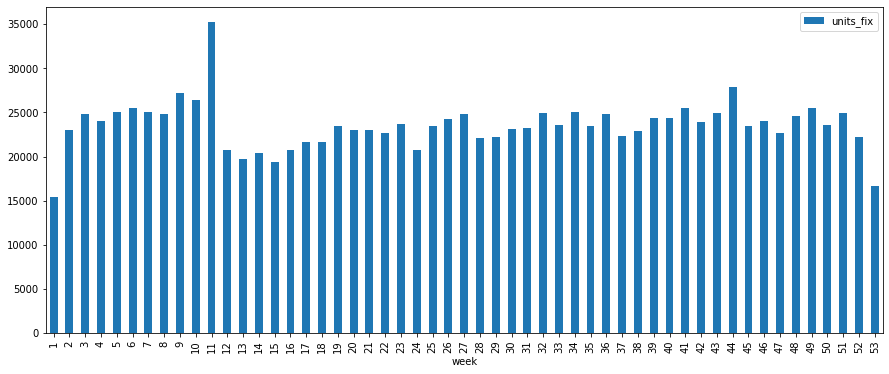

In [ ]:
sells_2020_byday['week'] = sells_2020_byday.index.map(lambda dt: pd.Int64Index(dt.isocalendar().week))
sells_2020_byweek = sells_2020_byday.groupby(by=["week"]).agg({'units_fix':'sum'})
sells_2020_byweek.plot(kind='bar',figsize=(15, 6))

### Sells by weekday

The worst day of this store is Sunday because only opens half day.


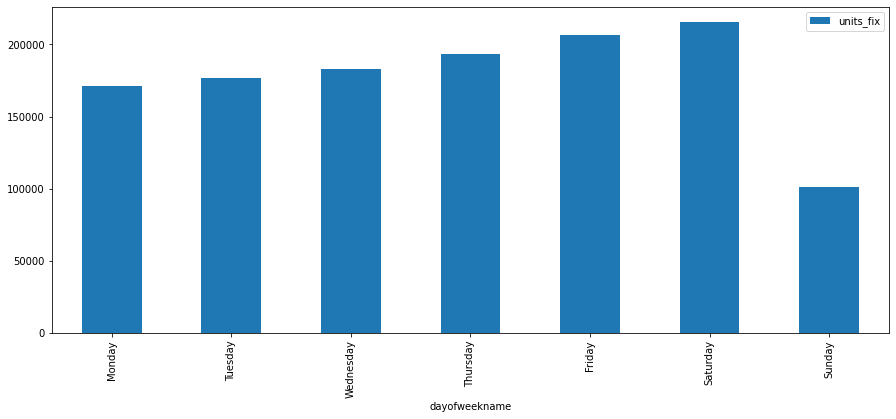

In [ ]:
sells_2020_byday['dayofweek'] = sells_2020_byday.index.map(lambda dt: dt.dayofweek)
sells_2020_byweekday = sells_2020_byday.groupby(by=["dayofweek"]).agg({'units_fix':'sum'})
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
sells_2020_byweekday['dayofweekname'] = sells_2020_byweekday.apply(lambda x : days[x.name],axis=1)
sells_2020_byweekday.set_index('dayofweekname').plot(kind='bar',figsize=(15, 6) )

### Sells by Hour
We can view that this store doesn't stop on midday. The morning is clearly better rather afternoon/evening.

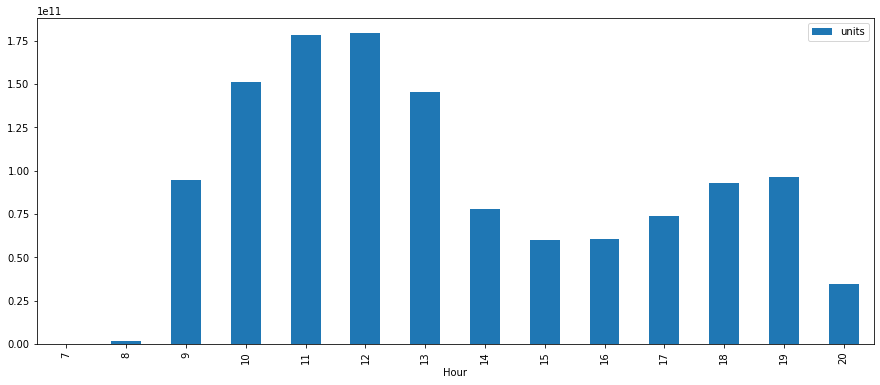

In [ ]:
sells_2020_byhour = sells_2020.groupby(by=["hour_fix"]).agg({'units':'sum'})
sells_2020_byhour.plot(kind='bar',figsize=(15, 6), xlabel='Hour')

### Sells by Product



It's clearly observable that small group of products has the major part of sells.

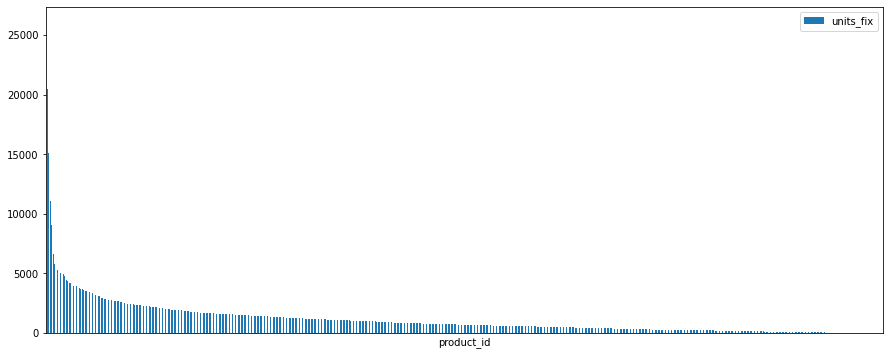

In [ ]:
sells_2020_byproduct = sells_2020.groupby(by=["product_id"]).agg({'units_fix':'sum'})
sells_2020_byproduct.sort_values(by='units_fix', ascending=False, inplace=True)
sells_2020_byproduct.plot(kind='bar',figsize=(15, 6),xticks=[])

Observing the top sales it's visible that the bags can be removed to avoid recomendations of this kind of product.

In [ ]:
sells_2020_byproduct_wdesc = sells_2020_byproduct.join(products['product_desc'], on='product_id')
sells_2020_byproduct_wdesc.head(15)

,units_fix,product_desc
product_id,,
9117,26066.0,BOLSAS CAMISETA GALG
8055,23754.0,BOLSAS CAMISETA CON
7550,20488.0,LECHE ENTERA BONAREA
7551,15087.0,LECHE SEMIDESNATADA
7665,14994.0,"AGUA BONï¿½REA 1,5 L."
6253,14086.0,HUEVOS M RUBIO BONAR
6252,11105.0,HUEVOS L RUBIO BONAR
7552,9068.0,LECHE DESNATADA BONA
2111,8574.0,PLATANOS CANARIAS BO


Find all products of kind 'bags' that shoud be removed.

In [ ]:
sells_2020_byproduct_wdesc[sells_2020_byproduct_wdesc['product_desc'].str.match('.*BOLSAS.*')]

,units_fix,product_desc
product_id,,
9117,26066.0,BOLSAS CAMISETA GALG
8055,23754.0,BOLSAS CAMISETA CON
8419,439.0,BOLSAS RAFIA COLOR N


### Sells by products on Christmas time

Try to identify if a time in a year can affect to the recommendations. To to this part we filter to get only the desember sells.

The plot of top sales of desember is very similar to the full year plot.

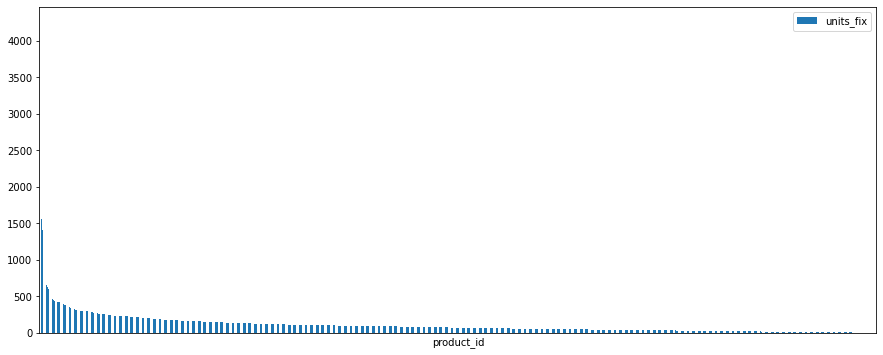

In [ ]:
sells_2020['month'] =sells_2020['date_fix'].apply(lambda dt: dt.month)
sells_des2020 = sells_2020[sells_2020['month']==12]
sells_des2020_byproduct =sells_des2020.groupby(by=["product_id"]).agg({'units_fix':'sum'})
sells_des2020_byproduct.sort_values(by='units_fix', ascending=False, inplace=True)
sells_des2020_byproduct.plot(kind='bar',figsize=(15, 6),xticks=[])

You can observe the top products are pretty similar but for example you can view that one product with higher price (Salmon) enters int his top list.

In [ ]:
sells_des2020_byproduct_wdesc = sells_des2020_byproduct.join(products['product_desc'], on='product_id')
sells_des2020_byproduct_wdesc.head(15)

,units_fix,product_desc
product_id,,
9117,4256.0,BOLSAS CAMISETA GALG
7550,1956.0,LECHE ENTERA BONAREA
7665,1555.0,"AGUA BONï¿½REA 1,5 L."
7551,1415.0,LECHE SEMIDESNATADA
6253,1311.0,HUEVOS M RUBIO BONAR
6252,843.0,HUEVOS L RUBIO BONAR
7552,827.0,LECHE DESNATADA BONA
2111,715.0,PLATANOS CANARIAS BO
6251,654.0,HUEVOS XL RUBIO BONA


## Check Correlation about Units and Amount

We can view in plot by days that he line of the normalitzated data is almost the same.

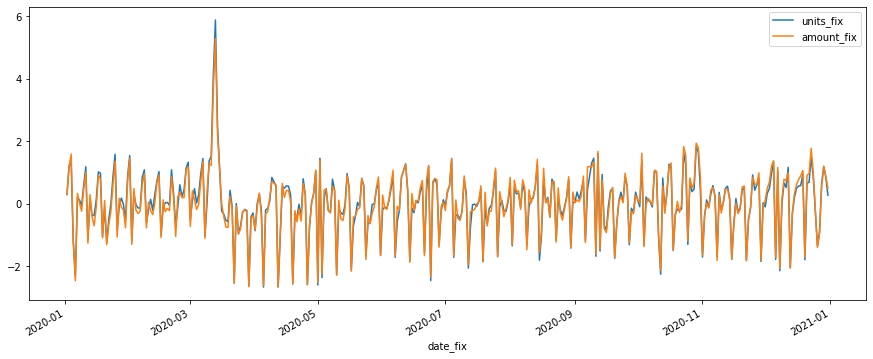

In [ ]:
sells_2020_byday_corr = sells_2020.groupby(by=["date_fix"]).agg({'units_fix':'sum','amount_fix':'sum'})

from sklearn import preprocessing

scaled_features = preprocessing.StandardScaler().fit_transform(sells_2020_byday_corr.values)
sells_2020_byday_normalitzated = pd.DataFrame(scaled_features, index=sells_2020_byday_corr.index, columns=sells_2020_byday_corr.columns)
sells_2020_byday_normalitzated[['units_fix','amount_fix']].plot(figsize=(15, 6))

As it's observed with Pearsons method we can afirm that units and amount has a very high correlation (up to 98,5%).

With this We can conclude that working only one of this columns is enought. And We can confirm that the amount has the total cost of each line (no he cost of each unit).

In [ ]:
sells_2020_byday_normalitzated.corr(method='pearson')

,units_fix,amount_fix
units_fix,1.000000,0.985044
amount_fix,0.985044,1.000000


As is expected doing a PCA all the meaning it's got on the first princial component

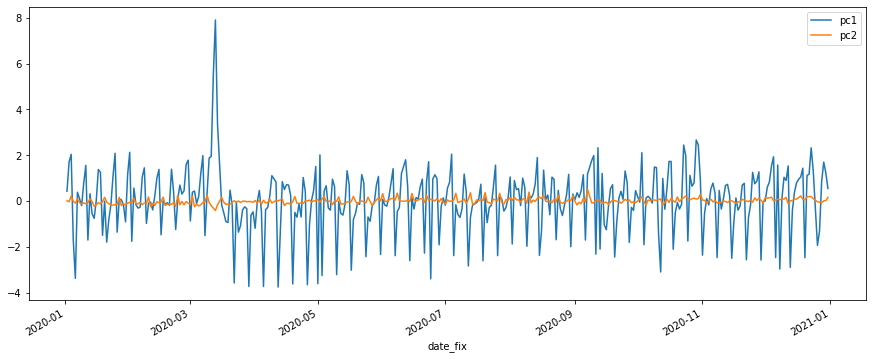

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(sells_2020_byday_normalitzated.values)
sells_2020_grouped_pca = pd.DataFrame(principalComponents, index=sells_2020_byday_normalitzated.index, columns=['pc1','pc2'])
sells_2020_grouped_pca.plot(figsize=(15, 6))

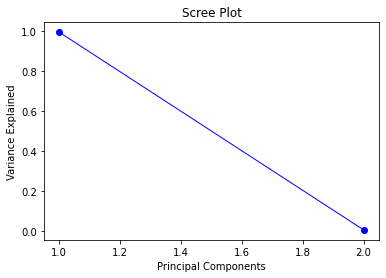

In [ ]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=1, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

In [ ]:
%%capture
!pip install mlxtend --upgrade --no-deps

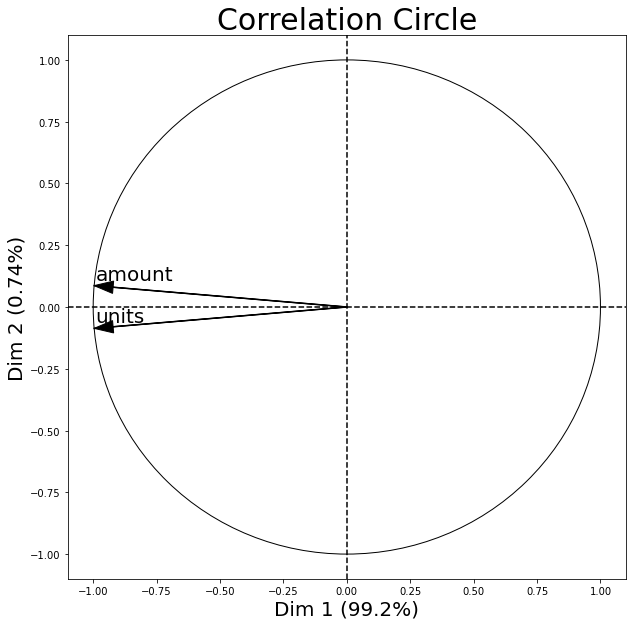

In [ ]:
#import mlxtend.plotting.
from mlxtend.plotting.pca_correlation_graph import plot_pca_correlation_graph
feature_names=['units','amount']

figure, correlation_matrix = plot_pca_correlation_graph(sells_2020_byday_normalitzated.values, 
                                                        feature_names,
                                                        dimensions=(1, 2),
                                                        figure_axis_size=10)


With this scatter, it is shown how the weekdays can be differentiated, some more than others. For example on Saturday and Monday they are quite clear that their behavior is different from each other, other days it is more difficult to define a group but something can be intuited. So it can be considered in future refinements.


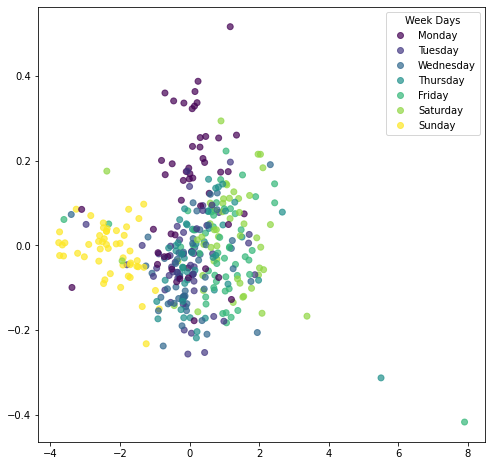

In [ ]:
(fig, ax) = plt.subplots(figsize=(8, 8))
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday','Saturday','Sunday']
scatter = ax.scatter(x=sells_2020_grouped_pca["pc1"], y=sells_2020_grouped_pca["pc2"], alpha=0.7, \
                     c=sells_2020_byday.index.map(lambda dt: dt.dayofweek))
                
handles = scatter.legend_elements(num=range(7))[0]
ax.legend(title='Week Days', handles=handles, labels=days)
plt.show()

## Exploring Families

In the file of families contains the description of each one. This falis are classificated with upper levels too but this data is ommited because it is not needed. In fact, we like to use families with low number of products.

The file of families contains 8 columns but only the first 4 columns have data:
1. **family_id**: the family id is a sequence of 3 numbers splited by an asterisk `*` Each number is an a level of classification, so the first number is the most general and last the most specific. In order these are called: Sector, section and family.
2. **sector_desc**: The name of Sector *Not used*
3. **section_desc**: The name of section *Not used*
4. **family_desc**: The name of the family.
5. void
6. void
7. void
8. void

The families are the form to group products by similar types. Each scale of group the similarity are higher. This families are based from AECOC offers (https://www.aecoc.es/guias/clasificacion-estandarizada-de-producto/).

AECOC is an Spanish association of producers and distributors that is also associated with a global GS1 organization. One of their targets is offer a several standards and family codes is one of them.

The standard offers till 5 levels of classification but this company nowadays only works with 3 levels.

Sample of some lines:
```csv
FAMILIA ;DESCRIPCIO.SECTOR ; DESCRIPCIO.SECCIO  ;DESC.FAMILIA ;;;;
01*01*01 ;Alimentacion y Bebidas  ;ALIMENTACIÓN SECA ;Aceites ;;;;
01*01*02 ;Alimentacion y Bebidas  ;ALIMENTACIÓN SECA ;Cafés y sucedáneos ;;;;
...
01*02*01 ;Alimentacion y Bebidas  ;CONSERVAS ;Conservas de pescado y marisco ;;;;
01*02*02 ;Alimentacion y Bebidas  ;CONSERVAS ;Conservas vegetales ;;;;
...
01*03*01 ;Alimentacion y Bebidas  ;Làcteos y derivados ;Leche ;;;;
01*03*02 ;Alimentacion y Bebidas  ;Làcteos y derivados ;Leches no liquidas ;;;;
...
01*04*01 ;Alimentacion y Bebidas  ;BEBIDAS ;Aguas ;;;;
01*04*02 ;Alimentacion y Bebidas  ;BEBIDAS ;Bebidas refrescantes ;;;;
...
```

In [ ]:
families = pd.read_csv(file_families,sep=';', encoding='ISO-8859-1', skiprows=1,\
                    names=['family_id','x1','x2','family_desc','x3','x4','x5','x6'],\
                    converters={'family_id': str.strip})\
                    .drop(['x1','x2','x3','x4','x5','x6'],axis=1).set_index('family_id')
families

,family_desc
family_id,
00*00*00,Desconeguda
01*01*01,Aceites
01*01*02,Cafés y sucedáneos
01*01*03,Infusiones
01*01*04,Chocolates
...,...
99*99*94,Productes sant joan
99*99*95,Promoció gall d'indi
99*99*96,Productes setmana santa


As viewed in previous section the total of different products sold are 1100 and this products are categorized by 112 families. So the mean is that each family almost 10 products on each, but in fact many families has a lot of products.

In [ ]:
sells_2020_fam_prod = sells_2020.join(products['family_id'], on="product_id").groupby('family_id')['product_id'].apply(set)
sells_2020_fam_units = sells_2020.join(products['family_id'], on="product_id").groupby('family_id').agg({'units_fix':'sum'})
print ('Total families with sells in 2020 at this store: ', sells_2020_fam_prod.size)

Total families with sells in 2020 at this store:  112


In [ ]:
families_2020 = pd.DataFrame({'product_id':sells_2020_fam_prod, 'units':sells_2020_fam_units['units_fix'], 'count':sells_2020_fam_prod.apply(lambda x : len(x))})
families_2020.describe()


,units,count
count,112.000000,112.000000
mean,11126.544643,9.821429
std,15287.196653,11.614851
min,0.000000,1.000000
25%,1019.750000,2.750000
50%,4790.500000,6.000000
75%,14838.750000,13.000000
max,81842.000000,77.000000


It has a lot of sells on families that have a lot of products.



In [ ]:
total_units = int(sells_2020['units_fix'].sum())
print(f"Total units sold of all products in 2020: {total_units:,}")
families_2020['percent_units'] = families_2020['units'].apply(lambda u: (u/total_units) * 100)
families_2020_f = families_2020.join(families['family_desc'], on='family_id')
families_2020_f.sort_values(by='percent_units', ascending=False).head(15)


Total units sold of all products in 2020: 1,246,173


,product_id,units,count,percent_units,family_desc
family_id,,,,,
02*01*05,"{3599, 5164, 5165, 5169, 5174, 5175, 5177, 517...",81842.0,77,6.567467,Aves
02*01*02,"{4481, 4354, 4483, 4355, 4486, 4487, 4488, 448...",63167.0,41,5.068879,Porcino
01*03*01,"{7552, 7558, 7870, 8492, 8493, 7796, 7797, 789...",54684.0,10,4.388155,Leche
02*01*10,"{5890, 5895, 4493, 4496, 6164, 6165, 6166, 681...",51250.0,36,4.112591,Elaborados Frescos
03*01*07,"{6969, 9117, 8055}",49840.0,3,3.999445,Utiles de limpieza
01*01*20,"{2437, 2442, 2443, 2445, 2447, 2448, 2449, 245...",46409.0,37,3.724122,Frutos secos y fruta seca
02*01*07,"{6215, 6251, 6252, 6253, 6255, 3248, 6330}",42370.0,7,3.400009,Huevos
02*05*01,"{3072, 8229, 8202, 1642, 1647, 1648, 3091, 306...",38234.0,14,3.068113,Postres
02*03*06,"{6920, 6170, 6940, 7069, 6182, 7079, 7081, 708...",36321.0,24,2.914603,Fuet


The products with high sells tend to be in families that has a more products and as inverse the products with less sales tends to be in families with less products.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f0f1dbfae10>,
      dtype=object)

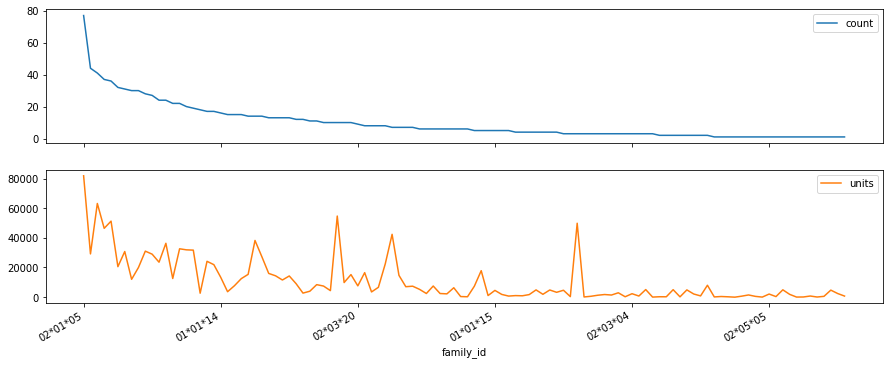

In [ ]:
families_2020[['count','units']].sort_values(by='count', ascending=False).plot(sharey=False, subplots=True, figsize=(15,6))

# Data Exploration Conclusions




On each point that we try variations we found variations. So, exists a lot of ways to refine and reduce the contextos of the forecast to make recommendations. 

Another thing to take in account is that some products has a very high sells over other products. This products can affect a lot on the recommender so they have a very high provabilty that these are recommended on each sell. The consideration that we have to take  depends on the bussines strategy if it likes to fortify the top products or not. 

The use of families as a principal data to make a recomendatios isn't a good idea because after it is need to choose a product that can be neeed to choose from a big group. Also, the families are pretty unbalanced the recomendations can be with many bias.
